In [1]:
import numpy as np
import cv2
import numpy
import math
import os
import sklearn.linear_model
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import Data_File
import cost_functions
plt.close('all')

In [2]:
train_prop = .5
test_prop = .3
v_prop = .2

Data_File.data_writer('Dataset',train_prop,test_prop,v_prop)


In [3]:
test_error = []
train_error = []
cv_error = []
x_axis = []




train_x,train_y = Data_File.Data('faces')
v_x,v_y = Data_File.Data('cross_val')
test_x,test_y = Data_File.Data('test')

for k in range(2,50):    
    
    
    h,w = train_y[0].shape
    
    y = train_y.reshape((len(train_y),w*h))
    X = train_x.reshape((len(train_x),int(h*w*.25)))
    
    model = KNeighborsRegressor(n_neighbors=k)
    
    print ("Started training Model "+str(k))
    
    model.fit(X,y)
    
    Train_error = cost_functions.mse_model(X,y,model)
    print ("Training  Error with k = "+ str(k)+"  is ",Train_error)
    
    s = cost_functions.avg_psnr(X,y,model)
    print ("Average training PSNR : with K = "+str( k) + ' is '+str( s))
    
    
    #######V Data####
    
    
    
    
    y = v_y.reshape((len(v_y),w*h))/255
    X = v_x.reshape((len(v_x),int(h*w*.25)))/255
    
    img_id=0
    pred = model.predict(X[:,:])
    
    error = cost_functions.mse_model(X,y,model)
    print ("CV Error with k = "+ str(k)+"  is ",error)
    
    s = 0
    pred1 = model.predict(X)
    
    s = cost_functions.avg_psnr(X,y,model)
    
    print ("Average CV PSNR : with K = "+ str(k) + ' is '+ str(s))
    
    reshaped = pred.reshape((len(pred),h,w))
    
    
    cv_error.append(error)
    
    x_axis.append(k)
    

Started training Model 2
('Training  Error with k = 2  is ', 0.011260383100201748)
Average training PSNR : with K = 2 is 20.151149608
('CV Error with k = 2  is ', 0.10109223128258195)
Average CV PSNR : with K = 2 is 10.263855153
Started training Model 3
('Training  Error with k = 3  is ', 0.016639093941076013)
Average training PSNR : with K = 3 is 18.4653614313
('CV Error with k = 3  is ', 0.10692026922947404)
Average CV PSNR : with K = 3 is 10.0128260785
Started training Model 4
('Training  Error with k = 4  is ', 0.019760894593937647)
Average training PSNR : with K = 4 is 17.6892035415
('CV Error with k = 4  is ', 0.10992470121208393)
Average CV PSNR : with K = 4 is 9.88871259404
Started training Model 5
('Training  Error with k = 5  is ', 0.02170201866120057)
Average training PSNR : with K = 5 is 17.2900454662
('CV Error with k = 5  is ', 0.11566447130039659)
Average CV PSNR : with K = 5 is 9.66075740432
Started training Model 6
('Training  Error with k = 6  is ', 0.0232896130713762

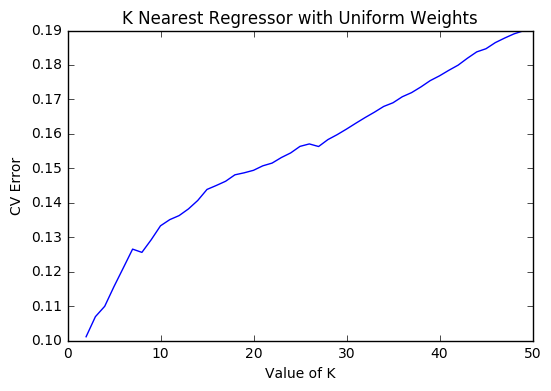

0

In [4]:
plt.close('all')
fig = plt.figure()
plt.plot(x_axis,cv_error)
plt.xlabel('Value of K')
plt.ylabel('CV Error')
plt.title('K Nearest Regressor with Uniform Weights')
plt.show()
cv_error.index(min(cv_error))

In [5]:
min_k = 2+cv_error.index(min(cv_error))

y = train_y.reshape((len(train_y),w*h))
X = train_x.reshape((len(train_x),int(h*w*.25)))
model = None
model = KNeighborsRegressor(n_neighbors=min_k)

model.fit(X,y)

s = cost_functions.avg_psnr(X,y,model)
print ("Average training PSNR : with K = "+str( min_k) + ' is '+str( s))
min_k


Average training PSNR : with K = 2 is 20.151149608


2

In [12]:
img_id=0

y = test_y.reshape((len(test_y),w*h))
X = test_x.reshape((len(test_x),int(h*w*.25)))


In [13]:
#Check the Testing Errors

pred = model.predict(X[:,:])
reshaped = pred.reshape((len(pred),h,w))
test_error = cost_functions.mse_model(X,y,model)

print ("Testing Error is ",test_error)
s = cost_functions.avg_psnr(X,y,model)

print ("Average Testing PSNR : ", s)

y = y.reshape((len(X),h,w))






('Testing Error is ', 0.043984483535067453)
('Average Testing PSNR : ', 14.034566783931876)


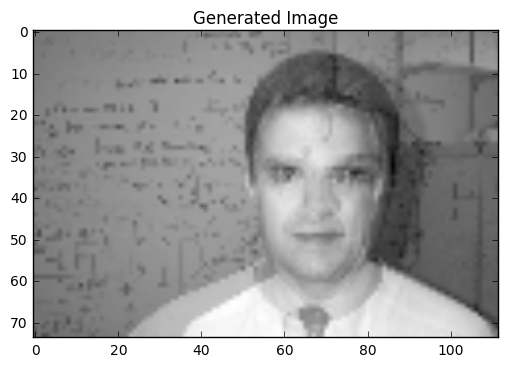

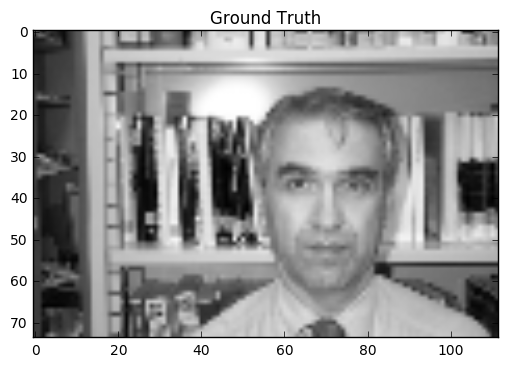

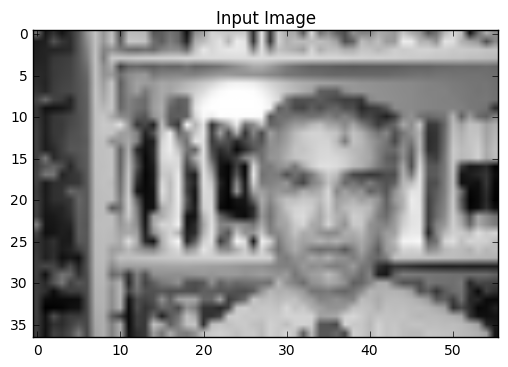

(74, 112)

In [10]:
plt.close('all')

figure = plt.figure()

plt.imshow(reshaped[img_id],cmap='gray')
plt.title("Generated Image")
figure = plt.figure()

plt.imshow(y[img_id],cmap='gray')
plt.title("Ground Truth")
figure = plt.figure()

plt.imshow(X[img_id].reshape((h//2,w//2)),cmap='gray')
plt.title("Input Image")

plt.show()

reshaped[img_id].shape